# Lead Scoring Case Study

## Problem Statement
An education company named X Education sells online courses to industry professionals. On any given day, many professionals who are interested in the courses land on their website and browse for courses. 

 

The company markets its courses on several websites and search engines like Google. Once these people land on the website, they might browse the courses or fill up a form for the course or watch some videos. When these people fill up a form providing their email address or phone number, they are classified to be a lead. Moreover, the company also gets leads through past referrals. Once these leads are acquired, employees from the sales team start making calls, writing emails, etc. Through this process, some of the leads get converted while most do not. The typical lead conversion rate at X education is around 30%.

X Education has appointed you to help them select the most promising leads, i.e. the leads that are most likely to convert into paying customers. The company requires you to build a model wherein you need to assign a lead score to each of the leads such that the customers with a higher lead score have a higher conversion chance and the customers with a lower lead score have a lower conversion chance. The CEO, in particular, has given a ballpark of the target lead conversion rate to be around 80%.

## Goals of the Case Study
- Build a logistic regression model to assign a lead score between 0 and 100 to each of the leads which can be used by the company to target potential leads. A higher score would mean that the lead is hot, i.e. is most likely to convert whereas a lower score would mean that the lead is cold and will mostly not get converted.
- There are some more problems presented by the company which your model should be able to adjust to if the company's requirement changes in the future so you will need to handle these as well. These problems are provided in a separate doc file. Please fill it based on the logistic regression model you got in the first step. Also, make sure you include this in your final PPT where you'll make recommendations.

### 1. Importing Libraries

In [3317]:
# Importing basic libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns',100)

# Importing warnings
import warnings
warnings.filterwarnings('ignore')

# Importing libraries for model building
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn import metrics
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import precision_recall_curve

### 2. Reading and Understaning the Data

In [3318]:
# Loading Leads data in Jupyter NB
leads = pd.read_csv('Leads.csv')
leads.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [3319]:
# Checking shape of data
leads.shape

(9240, 37)

In [3320]:
# Checking info of data
leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [3321]:
# Checking statistical Summary of data
leads.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


### 3. Data Cleaning

In [3322]:
# Replacing 'Select' with NaN, since it is equivalent to null
leads = leads.replace('Select', np.nan)

In [3323]:
# Checking Nulls in dataset
leads.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   3380
How did you hear about X Education               7250
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

In [3324]:
# Checking null % in each columns
round(100*leads.isnull().mean(),2).sort_values(ascending=False)

How did you hear about X Education               78.46
Lead Profile                                     74.19
Lead Quality                                     51.59
Asymmetrique Profile Score                       45.65
Asymmetrique Activity Score                      45.65
Asymmetrique Activity Index                      45.65
Asymmetrique Profile Index                       45.65
City                                             39.71
Specialization                                   36.58
Tags                                             36.29
What matters most to you in choosing a course    29.32
What is your current occupation                  29.11
Country                                          26.63
Page Views Per Visit                              1.48
TotalVisits                                       1.48
Last Activity                                     1.11
Lead Source                                       0.39
Receive More Updates About Our Courses            0.00
I agree to

In [3325]:
# Creating list of columns with more than 40% null values
drop_cols = 100*leads.isnull().mean()[100*leads.isnull().mean()>40]
drop_cols

How did you hear about X Education    78.463203
Lead Quality                          51.590909
Lead Profile                          74.188312
Asymmetrique Activity Index           45.649351
Asymmetrique Profile Index            45.649351
Asymmetrique Activity Score           45.649351
Asymmetrique Profile Score            45.649351
dtype: float64

In [3326]:
# Dropping the columns having 40% null values
leads = leads.drop(labels = drop_cols.index, axis = 1)

In [3327]:
# Analysing 'City' and 'Country' column
print(leads['City'].value_counts(dropna=False),'\n')
print(leads['Country'].value_counts(dropna=False))

NaN                            3669
Mumbai                         3222
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: City, dtype: int64 

India                   6492
NaN                     2461
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Bahrain                    7
Hong Kong                  7
Oman                       6
France                     6
unknown                    5
Kuwait                     4
South Africa               4
Canada                     4
Nigeria                    4
Germany                    4
Sweden                     3
Philippines                2
Uganda                     2
Italy                      2
Bangladesh                 2
Netherlands              

As we can interpret from the above analysis, there is a high number of missing values and data imbalance in both columns. We cannot use these columns for model building, so we should drop them.

In [3328]:
# Dropping 'City' and 'Country' columns
leads = leads.drop(['City','Country'], axis = 1)

In [3329]:
# Let's check 'Specialization' column
leads['Specialization'].value_counts(dropna=False)

NaN                                  3380
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Travel and Tourism                    203
Media and Advertising                 203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64

We can see that in this column also there are a lot of missing values, but specialization plays a significant role in business decision-making, so we will keep this column and impute null with 'Not Provided'.

In [3330]:
# Filling null values with 'Not Provided'
leads['Specialization'] = leads['Specialization'].fillna('Not Provided')

In [3331]:
# Let's check 'Tags' column
leads['Tags'].value_counts(dropna=False)

NaN                                                  3353
Will revert after reading the email                  2072
Ringing                                              1203
Interested in other courses                           513
Already a student                                     465
Closed by Horizzon                                    358
switched off                                          240
Busy                                                  186
Lost to EINS                                          175
Not doing further education                           145
Interested  in full time MBA                          117
Graduation in progress                                111
invalid number                                         83
Diploma holder (Not Eligible)                          63
wrong number given                                     47
opp hangup                                             33
number not provided                                    27
in touch with 

More than 35% of values are null, so it is better to drop it.

In [3332]:
# Dropping 'Tags' columns
leads = leads.drop('Tags',axis=1)

In [3333]:
# Let's check 'What matters most to you in choosing a course' column
leads['What matters most to you in choosing a course'].value_counts(dropna=False)

Better Career Prospects      6528
NaN                          2709
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

We can see that data is imbalance. It will be of no use in analysis, so it is better to drop it.

In [3334]:
# Dropping 'What matters most to you in choosing a course' columns
leads = leads.drop('What matters most to you in choosing a course', axis=1)

In [3335]:
# Let's check 'What matters most to you in choosing a course' column
leads['What is your current occupation'].value_counts(dropna=False)

Unemployed              5600
NaN                     2690
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

We will fill null values with 'Not Provided' as null percentage is low.

In [3336]:
# Filling null values with 'Not Provided'
leads['What is your current occupation'] = leads['What is your current occupation'].fillna('Not Provided')

In [3337]:
# Analysing 'Lead Source' column
leads['Lead Source'].value_counts()

Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
bing                    6
google                  5
Click2call              4
Press_Release           2
Social Media            2
Live Chat               2
youtubechannel          1
testone                 1
Pay per Click Ads       1
welearnblog_Home        1
WeLearn                 1
blog                    1
NC_EDM                  1
Name: Lead Source, dtype: int64

In [3338]:
# Combining similar lead sources in one category
leads['Lead Source'] = leads['Lead Source'].replace(['google'],'Google')
leads['Lead Source'] = leads['Lead Source'].replace(['bing','Click2call','Social Media','Live Chat','Press_Release','Pay per Click Ads','blog','WeLearn','welearnblog_Home','youtubechannel','testone','NC_EDM'],'Social Media and Others')

In [3339]:
# Analysing 'Lead Source' column after imputation
leads['Lead Source'].value_counts()

Google                     2873
Direct Traffic             2543
Olark Chat                 1755
Organic Search             1154
Reference                   534
Welingak Website            142
Referral Sites              125
Facebook                     55
Social Media and Others      23
Name: Lead Source, dtype: int64

In [3340]:
# Dropping the null values rows in the column 'TotalVisits'
leads = leads[~leads['TotalVisits'].isna()]

In [3341]:
# Dropping the null values rows in the column 'Lead Source'
leads = leads[~leads['Lead Source'].isna()]

In [3342]:
# Checking the number of null values again
leads.isnull().mean()

Prospect ID                                 0.0
Lead Number                                 0.0
Lead Origin                                 0.0
Lead Source                                 0.0
Do Not Email                                0.0
Do Not Call                                 0.0
Converted                                   0.0
TotalVisits                                 0.0
Total Time Spent on Website                 0.0
Page Views Per Visit                        0.0
Last Activity                               0.0
Specialization                              0.0
What is your current occupation             0.0
Search                                      0.0
Magazine                                    0.0
Newspaper Article                           0.0
X Education Forums                          0.0
Newspaper                                   0.0
Digital Advertisement                       0.0
Through Recommendations                     0.0
Receive More Updates About Our Courses  

In [3343]:
# Checking for value counts in each columns
for i in leads.columns:
    print(leads[i].value_counts(),'\n')
    print('---------------------------------------------')

7927b2df-8bba-4d29-b9a2-b6e0beafe620    1
5379ee79-64b7-44f8-8c56-0e1ca2d5b887    1
9757ace3-0656-4400-b519-fe0e3c67599e    1
889c1057-97ab-477c-a2b7-423e7df2d226    1
dd5ed9c0-298b-416e-b7e3-ee4da8511b8f    1
                                       ..
bff6c61d-25e3-4b1e-bf17-b634c91f3e2f    1
c62678c1-e741-4874-b5cf-500b2e8e2a78    1
4e859886-6ae2-462b-abd0-1df6ae65d8bf    1
78a9c58c-c287-41e3-a0f5-034061b73343    1
571b5c8e-a5b2-4d57-8574-f2ffb06fdeff    1
Name: Prospect ID, Length: 9074, dtype: int64 

---------------------------------------------
660737    1
602411    1
602438    1
602435    1
602420    1
         ..
630128    1
630135    1
630139    1
630158    1
579533    1
Name: Lead Number, Length: 9074, dtype: int64 

---------------------------------------------
Landing Page Submission    4885
API                        3578
Lead Add Form               581
Lead Import                  30
Name: Lead Origin, dtype: int64 

---------------------------------------------
Google    

As we can notice, there are 12 columns with high data imbalance. Since we cannot use these columns in our analysis, so it's best that we drop these columns.

In [3344]:
drop_cols_2 = ['Do Not Call','Search','Newspaper Article','X Education Forums','Newspaper','Digital Advertisement',
               'Through Recommendations','Receive More Updates About Our Courses','Update me on Supply Chain Content',
               'Get updates on DM Content','I agree to pay the amount through cheque','Magazine']

In [3345]:
# Dropping columns with data imbalance
leads = leads.drop(labels= drop_cols_2, axis = 1)

#### Outliers Analysis

In [3346]:
# Checking Outliers in numerical columns
leads[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']].describe(percentiles=[.25,.5,.75,.90,.95,.99])

,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9074.000000,9074.000000,9074.000000
mean,3.456028,482.887481,2.370151
std,4.858802,545.256560,2.160871
min,0.000000,0.000000,0.000000
25%,1.000000,11.000000,1.000000
50%,3.000000,246.000000,2.000000
75%,5.000000,922.750000,3.200000
90%,7.000000,1373.000000,5.000000
95%,10.000000,1557.000000,6.000000
99%,17.000000,1839.000000,9.000000


We can see there are outliers, we will cap them using soft capping(1-99).

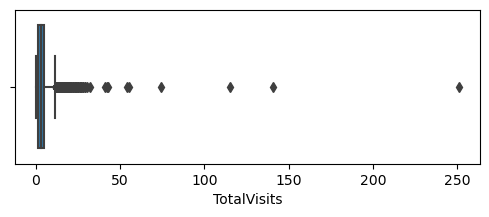

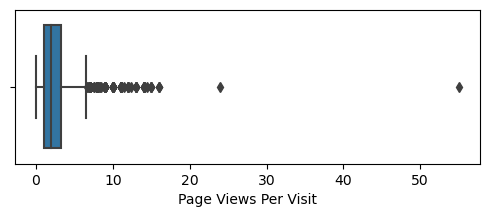

In [3347]:
# Boxplot of 'TotalVisits'
plt.figure(figsize=[6,2])
sns.boxplot(leads['TotalVisits'])
plt.show()

# Boxplot of 'Page Views Per Visit'
plt.figure(figsize=[6,2])
sns.boxplot(leads['Page Views Per Visit'])
plt.show()

In [3348]:
# Capping at 99th percentile
quantile = leads['TotalVisits'].quantile(0.99)
leads['TotalVisits'][leads['TotalVisits']>quantile] = quantile

In [3349]:
# Capping at 99th percentile
quantile = leads['Page Views Per Visit'].quantile(0.99)
leads['Page Views Per Visit'][leads['Page Views Per Visit']>quantile] = quantile

In [3350]:
# Checking statisafter capping
leads[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']].describe(percentiles=[.25,.5,.75,.90,.95,.99])

,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9074.000000,9074.000000,9074.000000
mean,3.343178,482.887481,2.341241
std,3.252302,545.256560,1.984635
min,0.000000,0.000000,0.000000
25%,1.000000,11.000000,1.000000
50%,3.000000,246.000000,2.000000
75%,5.000000,922.750000,3.200000
90%,7.000000,1373.000000,5.000000
95%,10.000000,1557.000000,6.000000
99%,17.000000,1839.000000,9.000000


In [3351]:
# Dropping 'Prospect ID' column from leads
leads = leads.drop('Prospect ID', axis = 1)
leads.head()

,Lead Number,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,A free copy of Mastering The Interview,Last Notable Activity
0,660737,API,Olark Chat,No,0,0.0,0,0.0,Page Visited on Website,Not Provided,Unemployed,No,Modified
1,660728,API,Organic Search,No,0,5.0,674,2.5,Email Opened,Not Provided,Unemployed,No,Email Opened
2,660727,Landing Page Submission,Direct Traffic,No,1,2.0,1532,2.0,Email Opened,Business Administration,Student,Yes,Email Opened
3,660719,Landing Page Submission,Direct Traffic,No,0,1.0,305,1.0,Unreachable,Media and Advertising,Unemployed,No,Modified
4,660681,Landing Page Submission,Google,No,1,2.0,1428,1.0,Converted to Lead,Not Provided,Unemployed,No,Modified


In [3352]:
# leads shape after droping columns
leads.shape

(9074, 13)

### 4. Data Visualization

#### Univariate Analysis

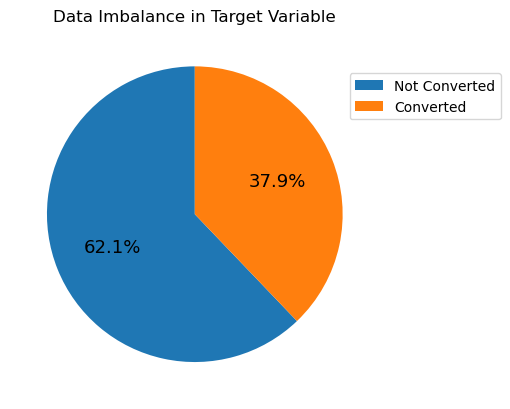

In [3353]:
# Let's check for data imbalance in dataset
plt.pie(leads['Converted'].value_counts(), textprops={'fontsize': 13, 'fontweight' : 20, 'color' : 'Black'}, startangle=90, autopct='%1.1f%%')
plt.title('Data Imbalance in Target Variable')
plt.legend(['Not Converted','Converted'],bbox_to_anchor=(0.9,0.9))
plt.show()

We can see there is some data imbalance in `Converted` column.

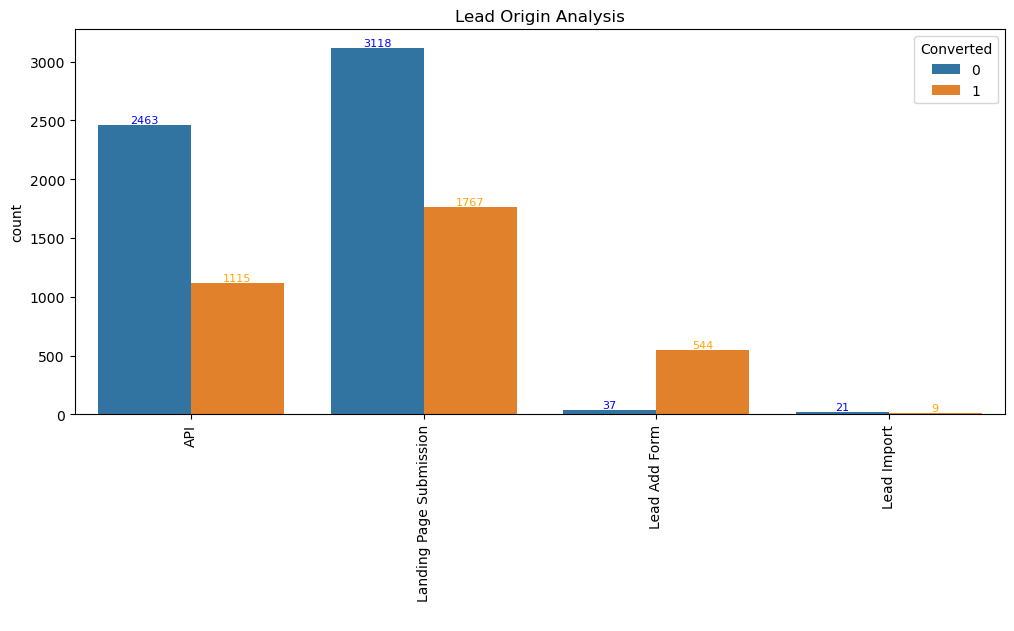

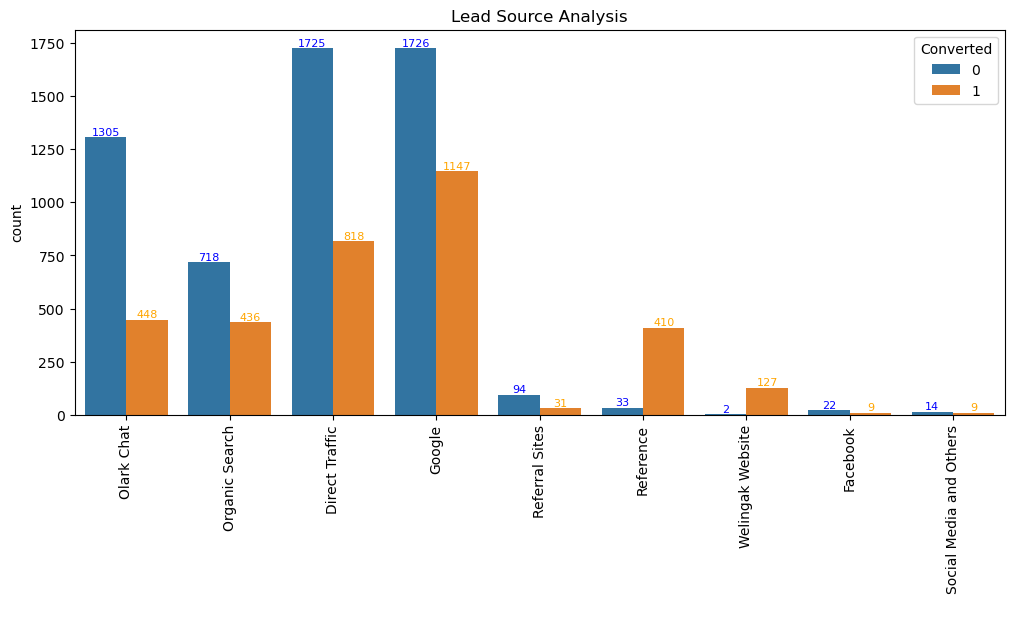

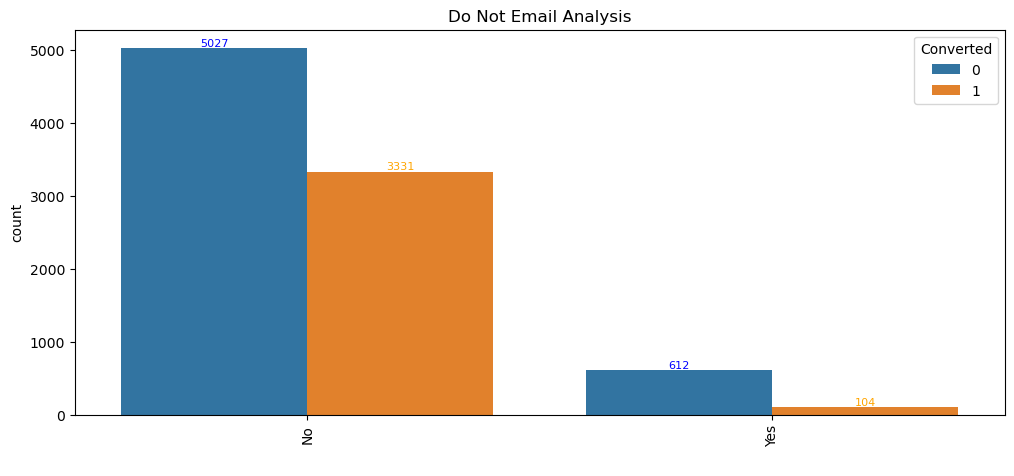

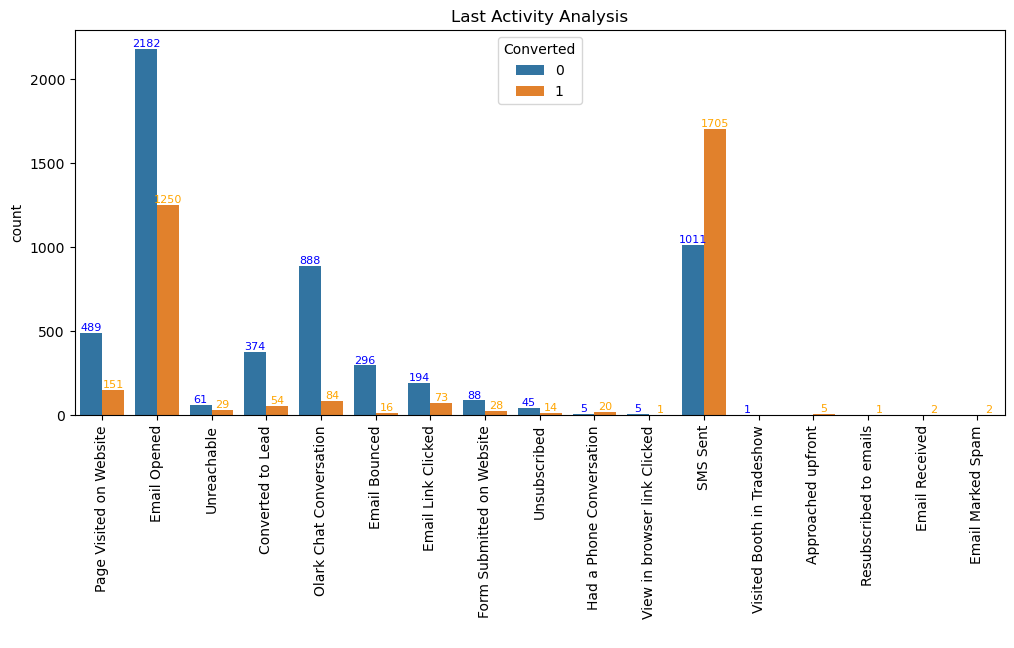

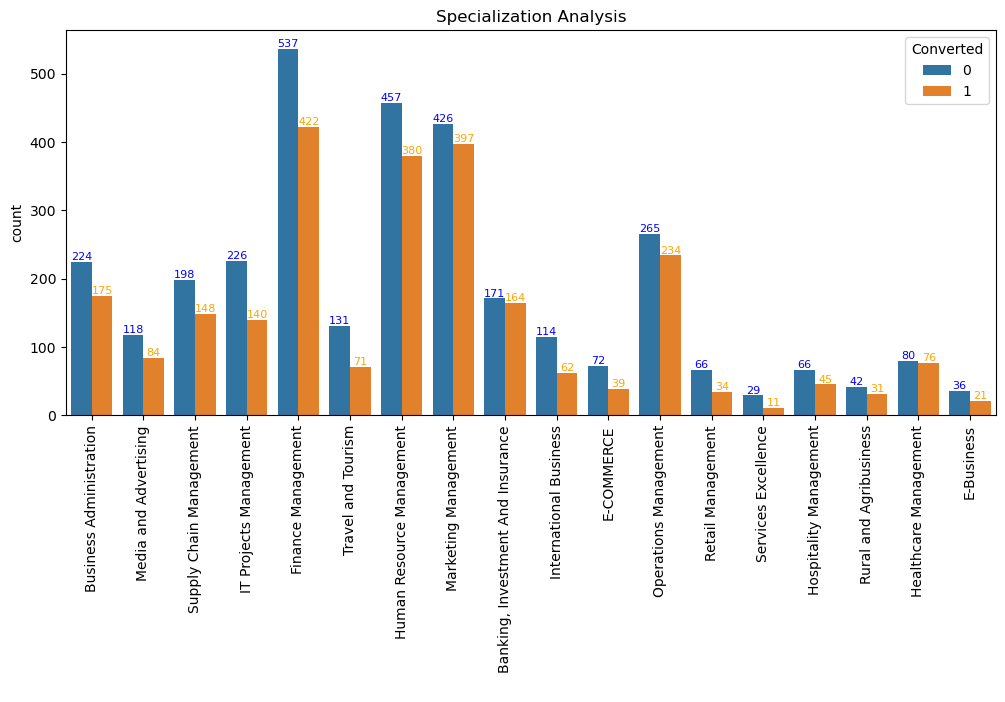

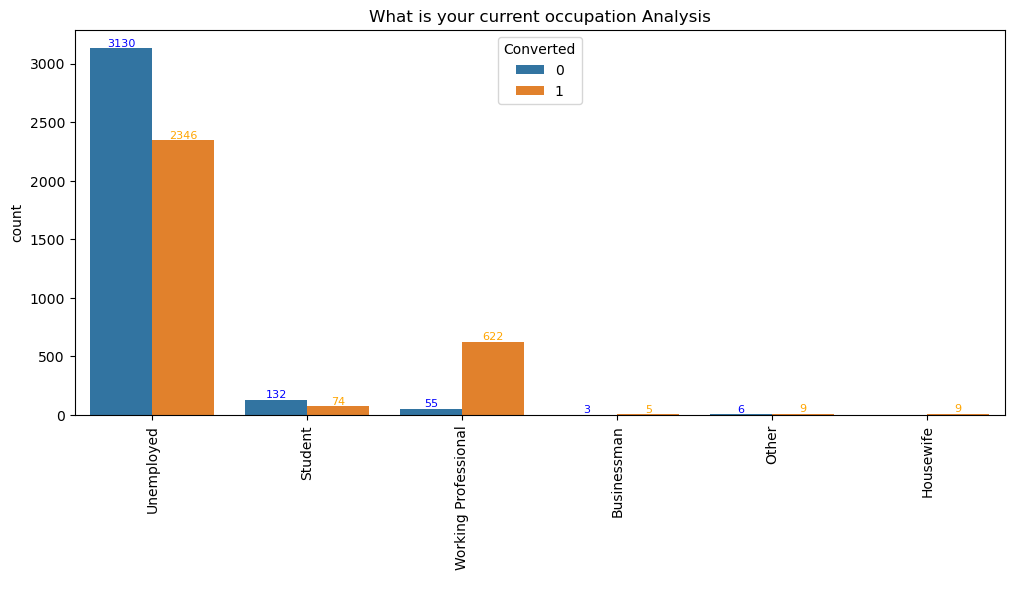

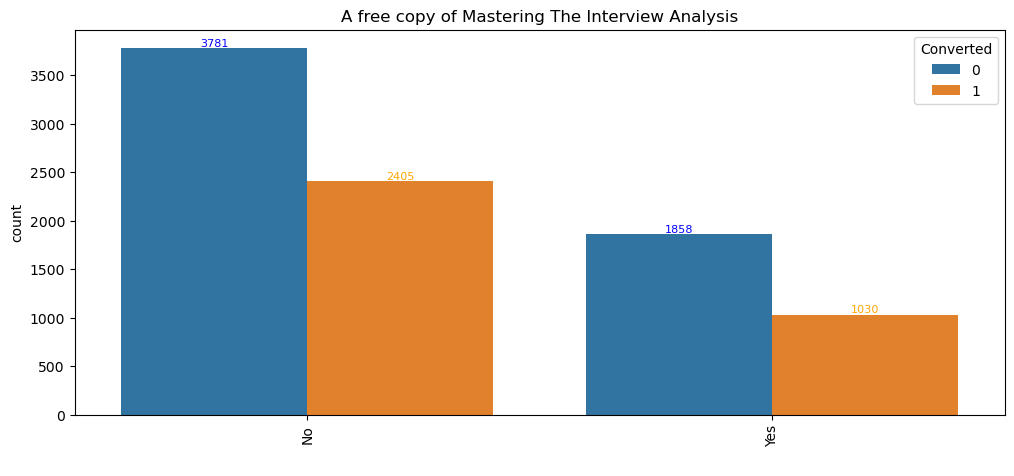

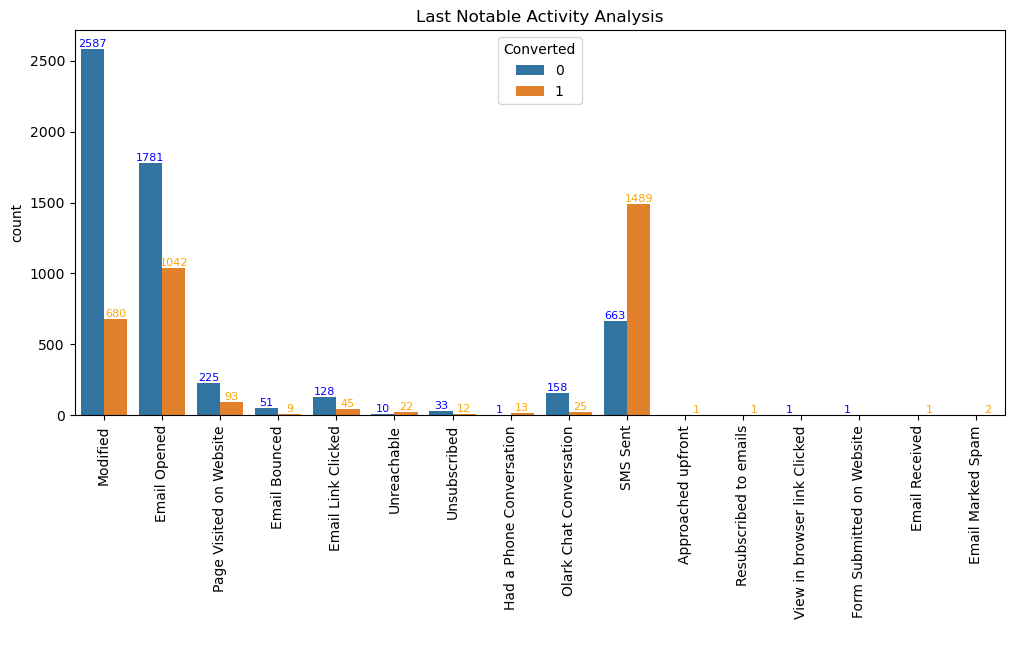

In [3354]:
# Creating coutplot of categorical columns
for i in leads.columns:
    if leads[i].dtype == 'O':
        plt.figure(figsize=[12,5])
        ax = sns.countplot(data = leads[~(leads == 'Not Provided')], x=i, hue = leads['Converted'])
        ax.bar_label(ax.containers[0],color='b', fontsize=8)
        ax.bar_label(ax.containers[1],color='orange', fontsize=8)
        plt.title(f"{i} Analysis")
        plt.xticks(rotation=90)
        plt.xlabel(' ')
        plt.show()

**<font size="4">Summary:</font>**

<u>Lead Origin: 
- Most of the leads identified was from `Landing Page Submission`.
- Customers from `Lead Add Form` have the highest conversion rate.

<u>Lead Source:
- Most of the leads are coming from `Google` and `Direct Traffic`.
- Leads from `Reference` and `Welingak Website` have the highest conversion rate. X Education should run more referral programs to get more leads from existing students.

<u>Do Not Email:
- Most of the customer wants to be emailed about the course.

<u>Specialization:
- Management courses are more in demand than other courses.
- `Human Resource Management`, `Marketing Management`, `Banking, Investment And Insurance`, `Operations Management` and `Healthcare Management` courses have higher conversion rate.
     
<u>What is your current occupation:
- Most of the leads are from `Unemployed` customers.
- Leads from ` Working Professionals` have an excellent conversion rate of 91.8%. 

<u>Last Notable Activity
- Customers whose last notable activity was `SMS Sent` have higher probability of conversion.

#### Bivariate Analysis

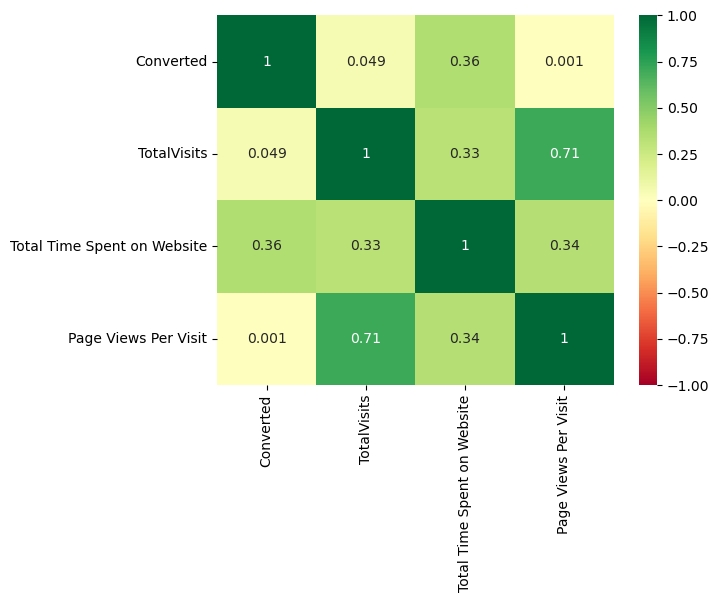

In [3355]:
# Creating heatmap for checking correlation between columns
corr = leads[['Converted','TotalVisits','Total Time Spent on Website','Page Views Per Visit']].corr()
sns.heatmap(corr, annot=True, cmap='RdYlGn', vmin=-1)
plt.show()

We can see that TotalVisits and Page Views Per Visit have a good correlation among all the variables.

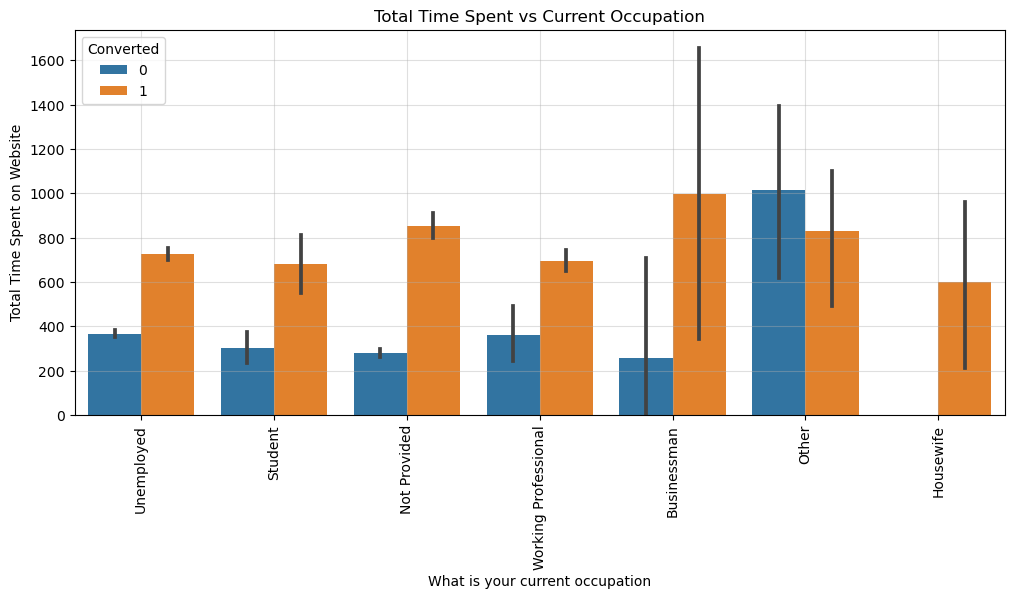

In [3356]:
# Visualising Current Occupation and Total Time Spent
plt.figure(figsize=[12,5])
sns.barplot(x=leads['What is your current occupation'], y=leads['Total Time Spent on Website'], estimator=np.mean, hue=leads['Converted'])
plt.title('Total Time Spent vs Current Occupation')
plt.xticks(rotation=90)
plt.grid(alpha=0.4)
plt.show()

We can see that the average time spent by converted leads is more than the average time spent by non-converted leads except 'Others'.

In [3357]:
# Segmenting into 'converted' and 'not_converted'
converted = leads[leads['Converted']==1]
not_converted = leads[leads['Converted']==0]

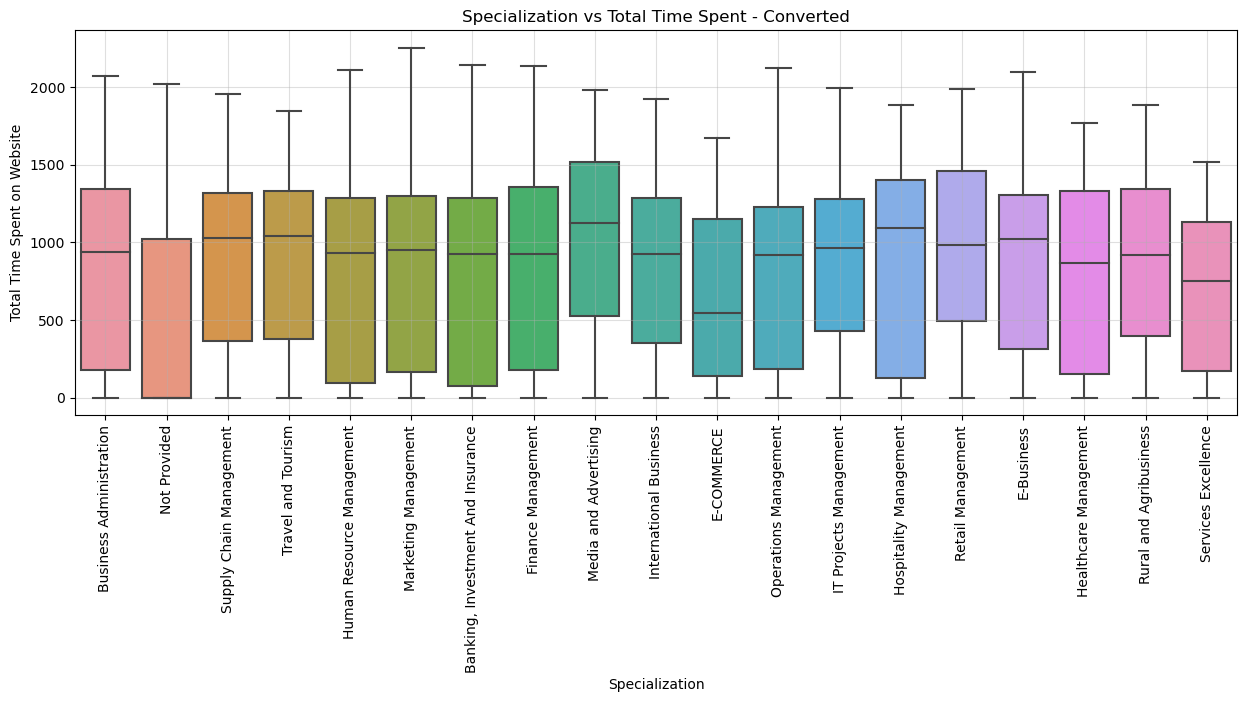

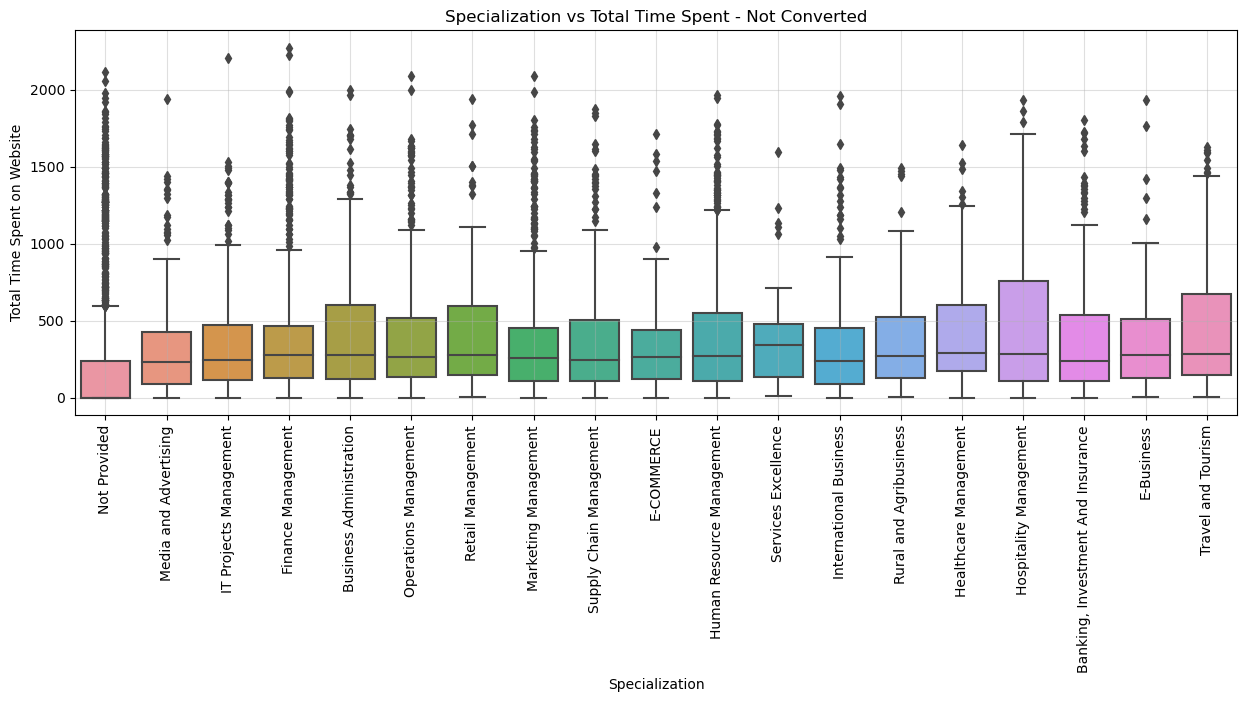

In [3358]:
# Visualising Specialization and Total Time Spent
plt.figure(figsize=[15,5])
sns.boxplot(x=converted['Specialization'], y=converted['Total Time Spent on Website'])
plt.title('Specialization vs Total Time Spent - Converted')
plt.xticks(rotation=90)
plt.grid(alpha=0.4)
plt.show()

plt.figure(figsize=[15,5])
sns.boxplot(x=not_converted['Specialization'], y=not_converted['Total Time Spent on Website'])
plt.title('Specialization vs Total Time Spent - Not Converted')
plt.xticks(rotation=90)
plt.grid(alpha=0.4)

plt.show()

Median time spent by converted leads in all specialization is more than median time spent by not converted leads.

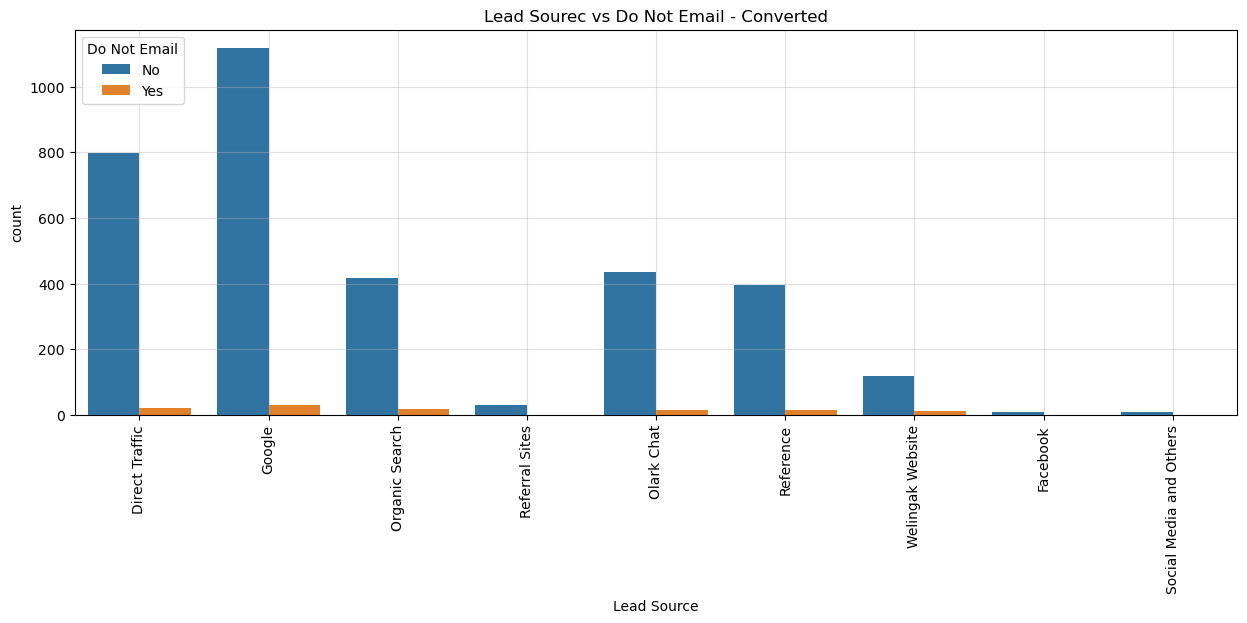

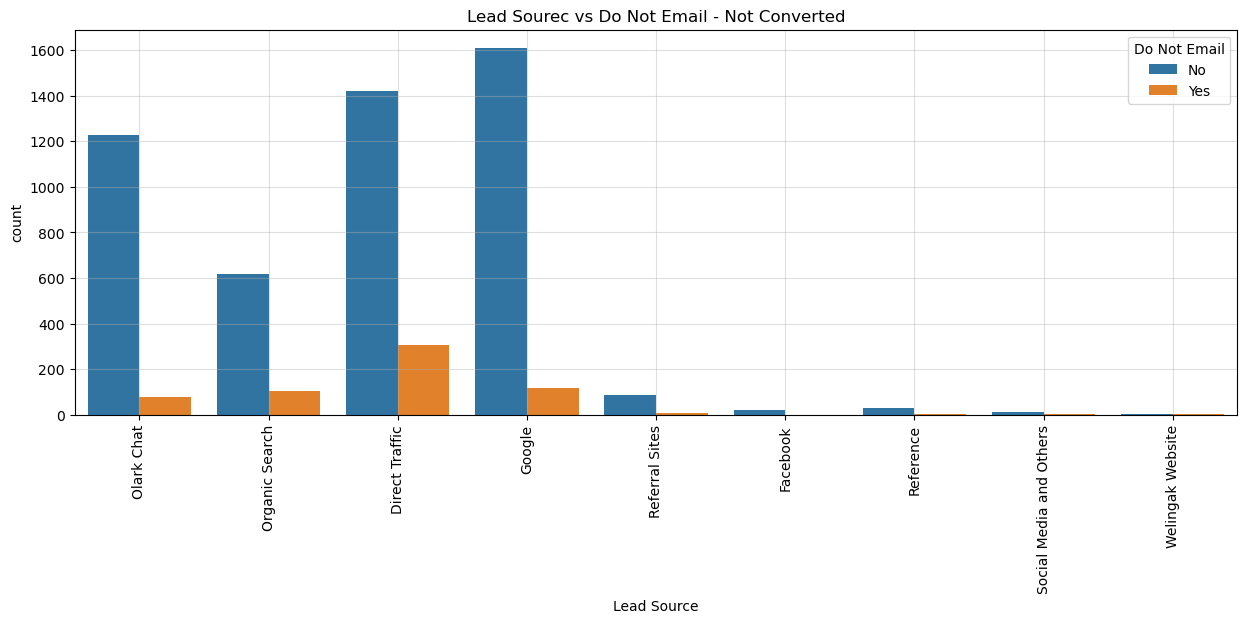

In [3359]:
# Visualising Lead Source and Do Not Email
plt.figure(figsize=[15,5])
sns.countplot(data = converted[~(converted== 'Not Provided')], x = 'Lead Source', hue= 'Do Not Email')
plt.title('Lead Sourec vs Do Not Email - Converted')
plt.xticks(rotation=90)
plt.grid(alpha=0.4)
plt.show()

plt.figure(figsize=[15,5])
sns.countplot(data = not_converted[~(not_converted== 'Not Provided')], x = 'Lead Source', hue= 'Do Not Email')
plt.title('Lead Sourec vs Do Not Email - Not Converted')
plt.xticks(rotation=90)
plt.grid(alpha=0.4)

plt.show()

We cannot draw any conclusion from this visualization, most of the clients want to receive notifications about courses via email.

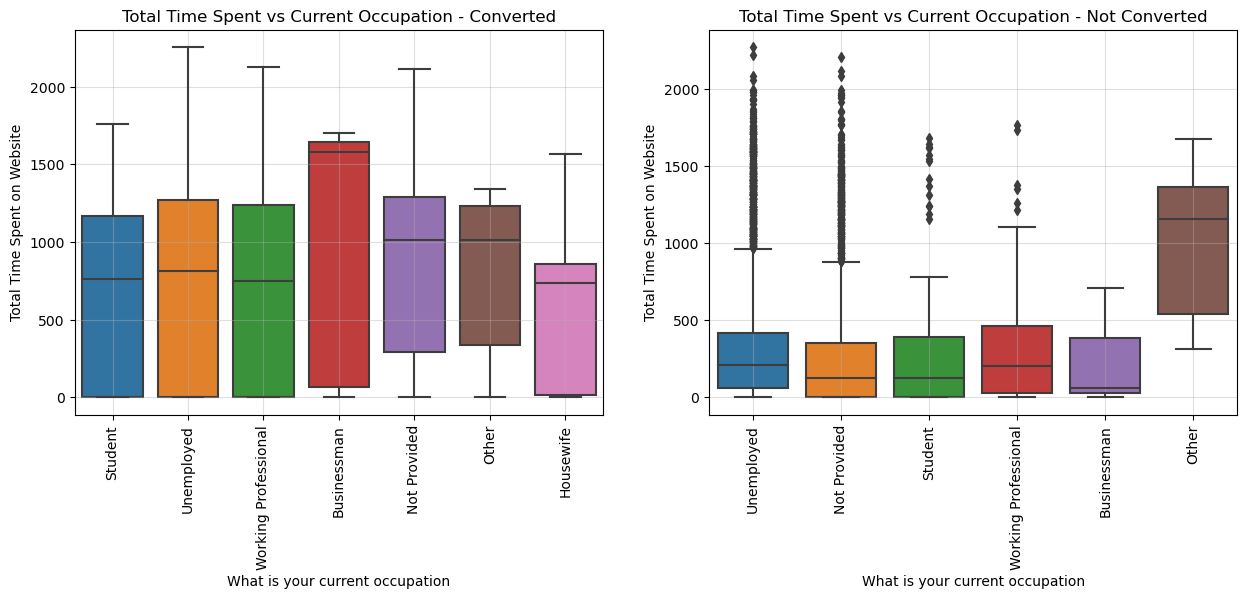

In [3360]:
# # Visualising Current Occupation and Total Time Spent
plt.figure(figsize=[15,5])

plt.subplot(1,2,1)
sns.boxplot(x=converted['What is your current occupation'], y=converted['Total Time Spent on Website'])
plt.title('Total Time Spent vs Current Occupation - Converted')
plt.xticks(rotation=90)
plt.grid(alpha=0.4)

plt.subplot(1,2,2)
sns.boxplot(x=not_converted['What is your current occupation'], y=not_converted['Total Time Spent on Website'])
plt.title('Total Time Spent vs Current Occupation - Not Converted')
plt.xticks(rotation=90)
plt.grid(alpha=0.4)

plt.show()

We can see that the median time spent by converted leads is more than the 75th percentile time spent by non-converted leads except 'Others'.

### 5. Data Preparation

Converting some binary variables (Yes/No) to 0/1

In [3361]:
# List of variables to map
varlist =  ['Do Not Email','A free copy of Mastering The Interview']

# Defining the map function
def binary_map(x):
    return x.map({'Yes': 1, "No": 0})

# Applying the function to the leads
leads[varlist] = leads[varlist].apply(binary_map)

In [3362]:
leads.head()

,Lead Number,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,A free copy of Mastering The Interview,Last Notable Activity
0,660737,API,Olark Chat,0,0,0.0,0,0.0,Page Visited on Website,Not Provided,Unemployed,0,Modified
1,660728,API,Organic Search,0,0,5.0,674,2.5,Email Opened,Not Provided,Unemployed,0,Email Opened
2,660727,Landing Page Submission,Direct Traffic,0,1,2.0,1532,2.0,Email Opened,Business Administration,Student,1,Email Opened
3,660719,Landing Page Submission,Direct Traffic,0,0,1.0,305,1.0,Unreachable,Media and Advertising,Unemployed,0,Modified
4,660681,Landing Page Submission,Google,0,1,2.0,1428,1.0,Converted to Lead,Not Provided,Unemployed,0,Modified


Creating dummy variables for categorical columns having more than 2 levels.

In [3363]:
# Creating a variable of categorical columns
dummy_vars = ['Lead Origin','Lead Source','Last Activity','Specialization','What is your current occupation',
              'Last Notable Activity']

In [3364]:
# Creating a dummy variable for some of the categorical variables and dropping the first one.
dummy = pd.get_dummies(leads[dummy_vars], drop_first=True)
dummy.head()

,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media and Others,Lead Source_Welingak Website,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Not Provided,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Not Provided,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [3365]:
# Shape of dummy
dummy.shape

(9074, 66)

In [3366]:
# Dropping 'Specialization_Not Provided', 'What is your current occupation_Not Provided' variables
# Since we cannot use them in decision making
dummy = dummy.drop(['Specialization_Not Provided','What is your current occupation_Not Provided'],axis=1)
dummy.head()

,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media and Others,Lead Source_Welingak Website,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [3367]:
# Shape of dummy after dropping variables
dummy.shape

(9074, 64)

In [3368]:
# Concating dummy columns dataframe with leads dataframe
leads_new = pd.concat([leads, dummy], axis=1)
leads_new.head()

,Lead Number,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,A free copy of Mastering The Interview,Last Notable Activity,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media and Others,Lead Source_Welingak Website,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,660737,API,Olark Chat,0,0,0.0,0,0.0,Page Visited on Website,Not Provided,Unemployed,0,Modified,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,660728,API,Organic Search,0,0,5.0,674,2.5,Email Opened,Not Provided,Unemployed,0,Email Opened,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,660727,Landing Page Submission,Direct Traffic,0,1,2.0,1532,2.0,Email Opened,Business Administration,Student,1,Email Opened,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,660719,Landing Page Submission,Direct Traffic,0,0,1.0,305,1.0,Unreachable,Media and Advertising,Unemployed,0,Modified,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,660681,Landing Page Submission,Google,0,1,2.0,1428,1.0,Converted to Lead,Not Provided,Unemployed,0,Modified,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [3369]:
# We have created dummies for the below variables, so we can drop them
leads_new = leads_new.drop(dummy_vars, axis=1)
leads_new.head()

,Lead Number,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media and Others,Lead Source_Welingak Website,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,660737,0,0,0.0,0,0.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,660728,0,0,5.0,674,2.5,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,660727,0,1,2.0,1532,2.0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,660719,0,0,1.0,305,1.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,660681,0,1,2.0,1428,1.0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [3370]:
# leads_new shape
leads_new.shape

(9074, 71)

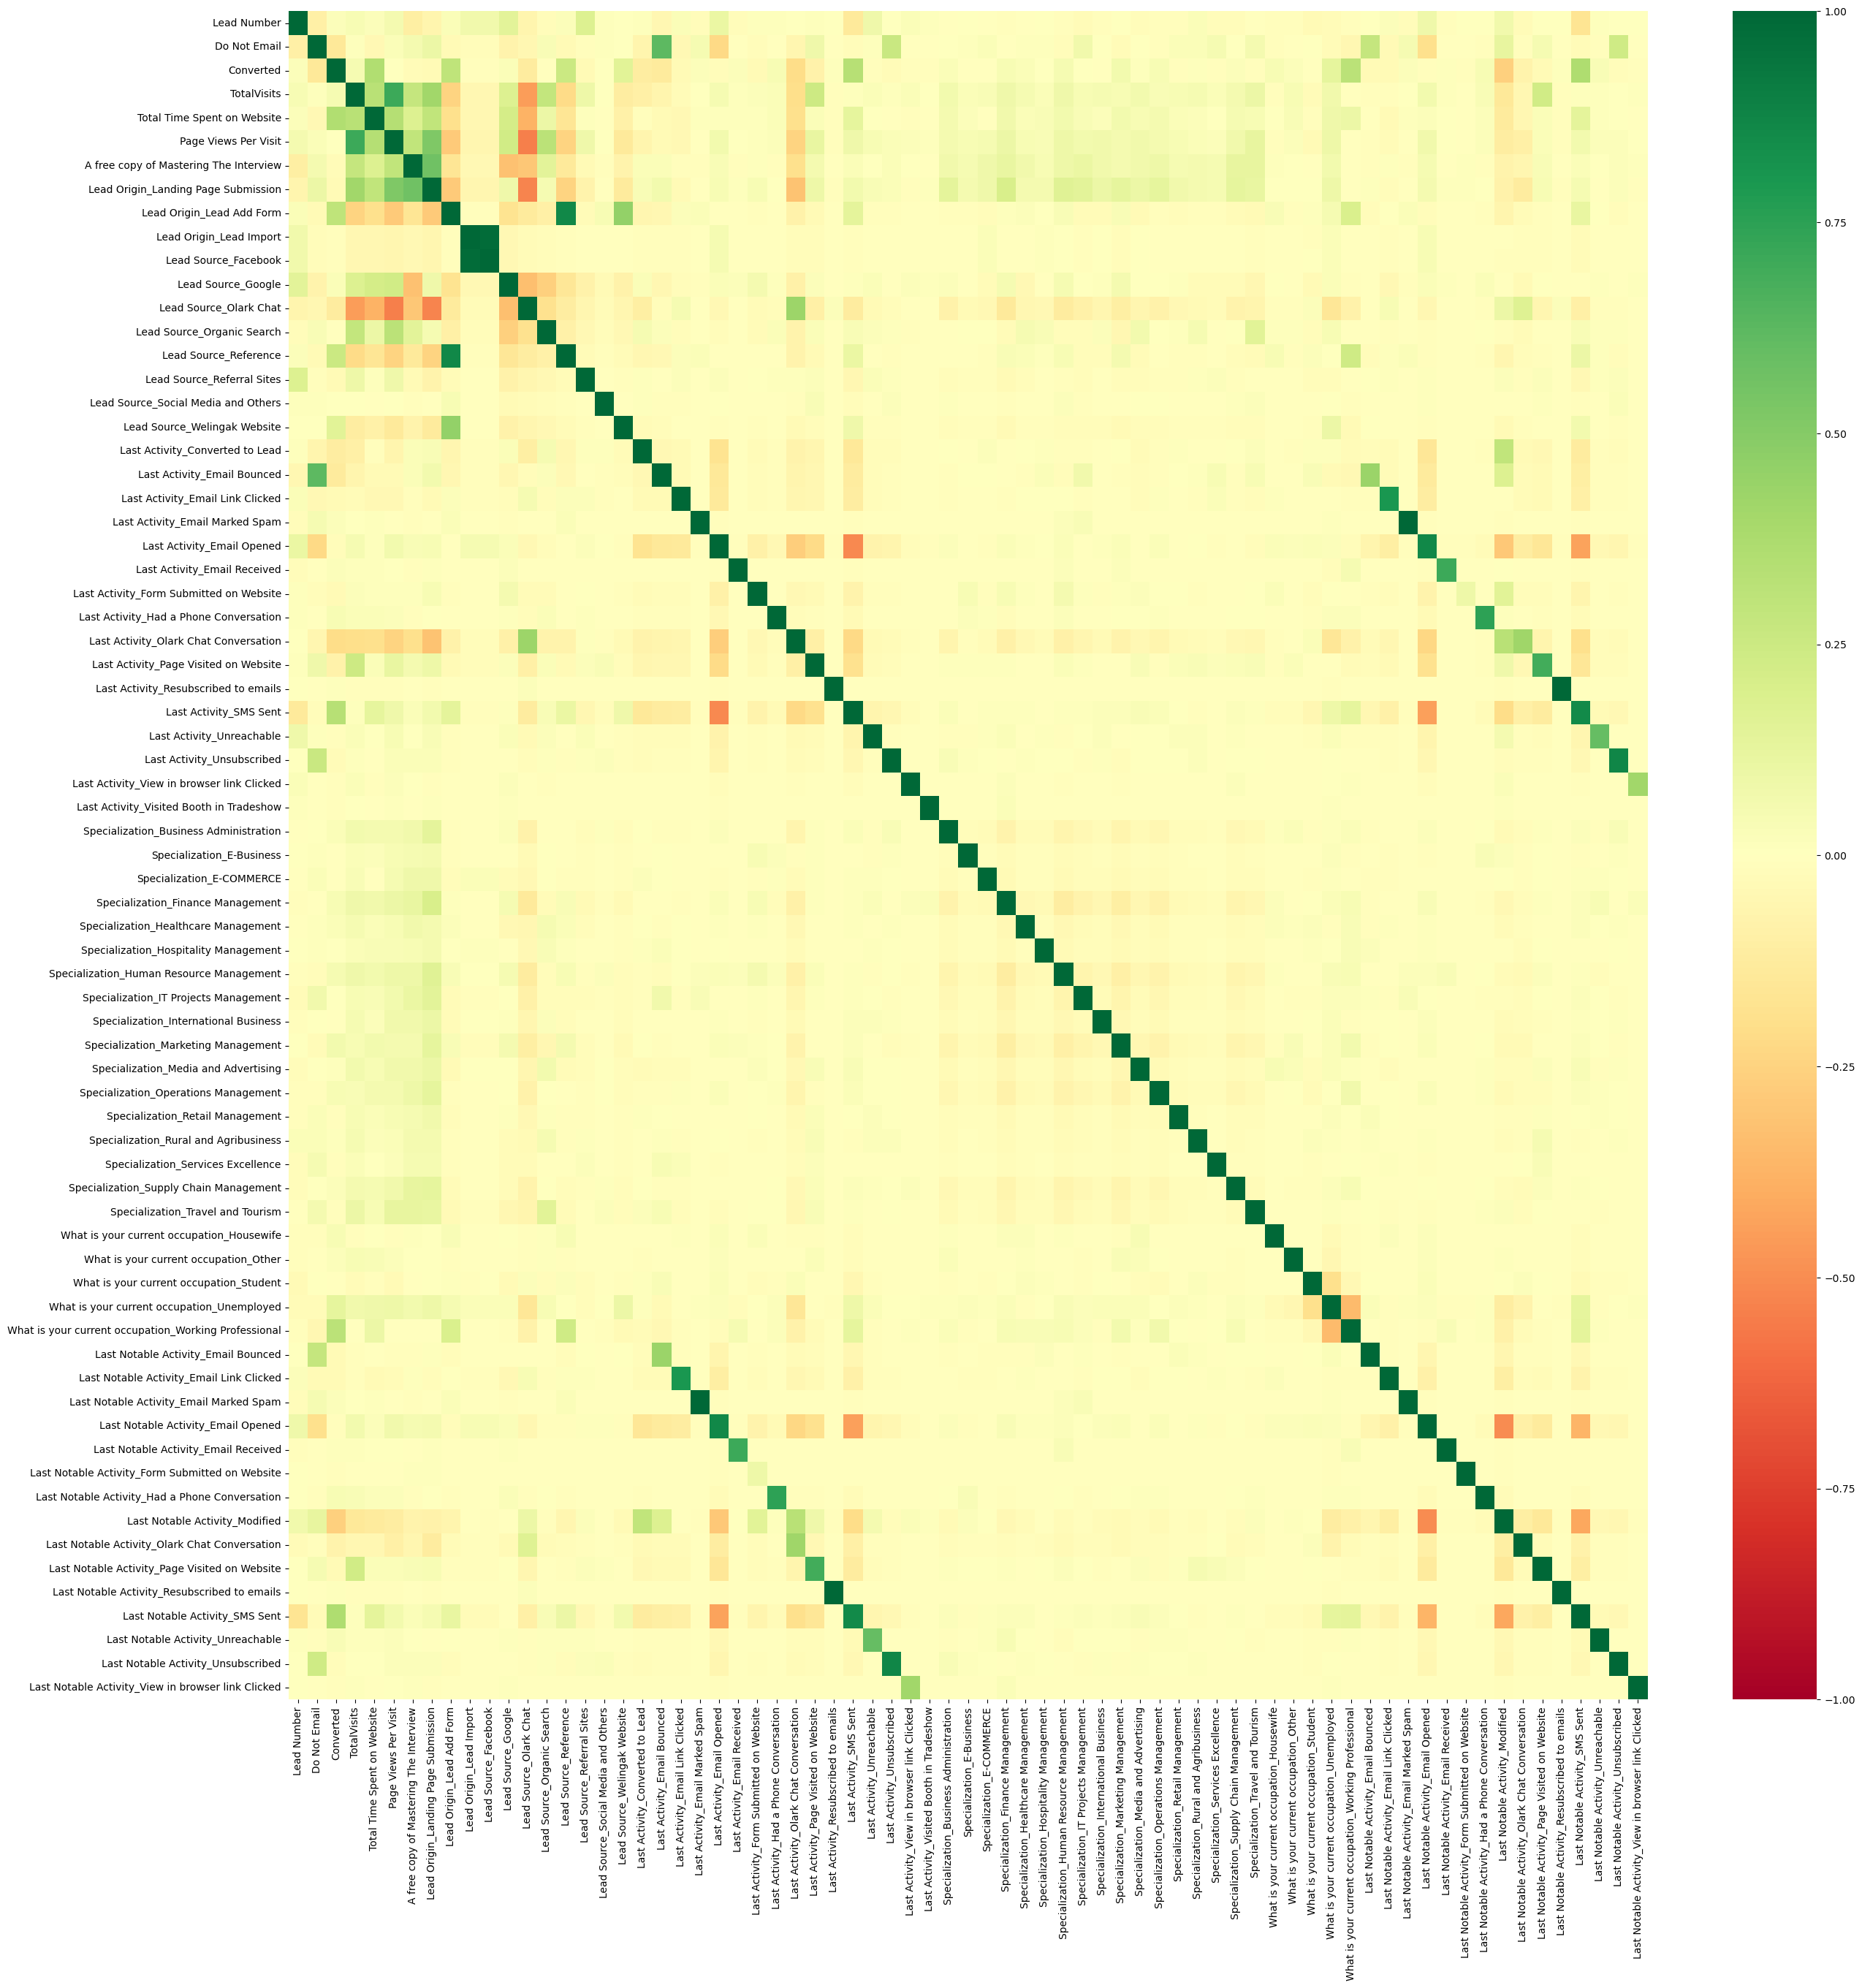

In [3371]:
# Making correlation heatmap to check if there is multicollinearity present or not
corr2 = leads_new.corr()
plt.figure(figsize=[30,30])
sns.heatmap(corr2, cmap='RdYlGn', vmin = -1)
plt.show()

We can see there is multicollinearity present between some features, so we will use RFE for feature selection.

### 6. Splitting Data into Train and Test Sets

In [3372]:
# We specify this so that the train and test data set always have the same rows, respectively

df_train, df_test = train_test_split(leads_new, train_size = 0.7, random_state = 100)

In [3373]:
# Train and test dataset shape
print(df_train.shape)
print(df_test.shape)

(6351, 71)
(2723, 71)


### 7. Rescaling the Features 

We will use MinMax scaling.

In [3374]:
scaler = MinMaxScaler()

In [3375]:
# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables
num_cols = ['TotalVisits','Total Time Spent on Website','Page Views Per Visit']
df_train[num_cols] = scaler.fit_transform(df_train[num_cols])

In [3376]:
# Train dataset after scaling
df_train.head()

,Lead Number,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media and Others,Lead Source_Welingak Website,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
3009,630949,0,0,0.117647,0.178347,0.222222,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
1012,649355,1,0,0.117647,0.085355,0.222222,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9226,579735,0,0,0.000000,0.000000,0.000000,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4750,614238,0,1,0.117647,0.619946,0.222222,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
7987,588625,0,1,0.294118,0.711590,0.277778,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


#### Dividing into X and Y sets for the model building

In [3377]:
y_train = df_train.pop('Converted')
X_train = df_train.drop('Lead Number', axis=1)

In [3378]:
y_train.head()

3009    0
1012    0
9226    0
4750    1
7987    1
Name: Converted, dtype: int64

In [3379]:
X_train.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media and Others,Lead Source_Welingak Website,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
3009,0,0.117647,0.178347,0.222222,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
1012,1,0.117647,0.085355,0.222222,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9226,0,0.000000,0.000000,0.000000,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4750,0,0.117647,0.619946,0.222222,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
7987,0,0.294118,0.711590,0.277778,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


### 8. Feature Selection using RFE

In [3380]:
# Running RFE with the output number of the variable equal to 15
logreg = LogisticRegression()
rfe = RFE(estimator = logreg, n_features_to_select = 15)           
rfe = rfe.fit(X_train, y_train)

In [3381]:
# List of features selected by RFE
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Do Not Email', True, 1),
 ('TotalVisits', False, 5),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 6),
 ('A free copy of Mastering The Interview', False, 46),
 ('Lead Origin_Landing Page Submission', False, 19),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 4),
 ('Lead Source_Facebook', False, 40),
 ('Lead Source_Google', False, 37),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', False, 53),
 ('Lead Source_Reference', False, 3),
 ('Lead Source_Referral Sites', False, 47),
 ('Lead Source_Social Media and Others', False, 18),
 ('Lead Source_Welingak Website', True, 1),
 ('Last Activity_Converted to Lead', True, 1),
 ('Last Activity_Email Bounced', False, 8),
 ('Last Activity_Email Link Clicked', False, 23),
 ('Last Activity_Email Marked Spam', False, 17),
 ('Last Activity_Email Opened', False, 55),
 ('Last Activity_Email Received', False, 49),
 ('Last Activity_Form Submitted on Website', False, 24),
 (

In [3382]:
# Selecting features supported bt RFE
col = X_train.columns[rfe.support_]
col

Index(['Do Not Email', 'Total Time Spent on Website',
       'Lead Origin_Lead Add Form', 'Lead Source_Olark Chat',
       'Lead Source_Welingak Website', 'Last Activity_Converted to Lead',
       'Last Activity_Had a Phone Conversation',
       'Last Activity_Olark Chat Conversation', 'Last Activity_SMS Sent',
       'What is your current occupation_Housewife',
       'What is your current occupation_Other',
       'What is your current occupation_Student',
       'What is your current occupation_Unemployed',
       'What is your current occupation_Working Professional',
       'Last Notable Activity_Unreachable'],
      dtype='object')

### 9. Building Model

In [3383]:
X_train_rfe = X_train[col]

In [3384]:
# Adding constant in X_train_1
X_train_1 = sm.add_constant(X_train_rfe)

In [3385]:
# Running first model and checking summary
log1 = sm.GLM(y_train,X_train_1, family = sm.families.Binomial())
res = log1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6335
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2577.7
Date:                Tue, 03 Jan 2023   Deviance:                       5155.5
Time:                        23:04:26   Pearson chi2:                 6.21e+03
No. Iterations:                    21   Pseudo R-squ. (CS):             0.4062
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -3.3670      0.108    -31.277      0.000      -3.578      -3.156
Do Not Email                                            -1.6793      0.171     -9.796      0.000      -2.015      -1.343
Total Time Spent on Website                              4.6332      0.167     27.792      0.000       4.306       4.960
Lead Origin_Lead Add Form                                3.5912      0.221     16.222      0.000       3.157       4.025
Lead Source_Olark Chat                                   1.4262      0.107     13.362      0.000       1.217       1.635
Lead Source_Welingak Website                             1.9962      0.752      2.655      0.008       0.523       3.470
Last Activity_Converted to Lead                         -1.3006      0.224     -5.800      0.000      -1.740      -0.861
Last Activity_Had a Phone Conversation                   2.7032      0.746      3.622      0.000       1.240       4.166
Last Activity_Olark Chat Conversation                   -1.3538      0.164     -8.258      0.000      -1.675      -1.032
Last Activity_SMS Sent                                   1.2411      0.076     16.410      0.000       1.093       1.389
What is your current occupation_Housewife               23.9664   1.58e+04      0.002      0.999   -3.09e+04     3.1e+04
What is your current occupation_Other                    1.9681      0.712      2.765      0.006       0.573       3.363
What is your current occupation_Student                  1.3914      0.230      6.051      0.000       0.941       1.842
What is your current occupation_Unemployed               1.2785      0.088     14.467      0.000       1.105       1.452
What is your current occupation_Working Professional     3.7760      0.200     18.921      0.000       3.385       4.167
Last Notable Activity_Unreachable                        2.0394      0.491      4.153      0.000       1.077       3.002
========================================================================================================================
"""

In [3386]:
# Check for the VIF values of the feature variables.
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values,i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
12,What is your current occupation_Unemployed,2.09
1,Total Time Spent on Website,1.88
2,Lead Origin_Lead Add Form,1.60
8,Last Activity_SMS Sent,1.56
3,Lead Source_Olark Chat,1.48
7,Last Activity_Olark Chat Conversation,1.37
4,Lead Source_Welingak Website,1.33
13,What is your current occupation_Working Profes...,1.31
0,Do Not Email,1.05
5,Last Activity_Converted to Lead,1.05


As we can see p-value of 'What is your current occupation_Housewife' is very high, we need to drop this variable.

In [3387]:
# Dropping 'What is your current occupation_Housewife' from model
X_train_new = X_train_rfe.drop('What is your current occupation_Housewife', axis = 1)

In [3388]:
# Model 2
X_train_2 = sm.add_constant(X_train_new)
log2 = sm.GLM(y_train,X_train_2, family = sm.families.Binomial())
res = log2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6336
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2586.1
Date:                Tue, 03 Jan 2023   Deviance:                       5172.3
Time:                        23:04:26   Pearson chi2:                 6.25e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4047
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -3.3352      0.107    -31.262      0.000      -3.544      -3.126
Do Not Email                                            -1.6841      0.171     -9.825      0.000      -2.020      -1.348
Total Time Spent on Website                              4.6305      0.166     27.833      0.000       4.304       4.957
Lead Origin_Lead Add Form                                3.6460      0.222     16.438      0.000       3.211       4.081
Lead Source_Olark Chat                                   1.4175      0.107     13.310      0.000       1.209       1.626
Lead Source_Welingak Website                             1.9420      0.752      2.582      0.010       0.468       3.416
Last Activity_Converted to Lead                         -1.3077      0.224     -5.836      0.000      -1.747      -0.869
Last Activity_Had a Phone Conversation                   2.6959      0.746      3.614      0.000       1.234       4.158
Last Activity_Olark Chat Conversation                   -1.3608      0.164     -8.307      0.000      -1.682      -1.040
Last Activity_SMS Sent                                   1.2317      0.076     16.311      0.000       1.084       1.380
What is your current occupation_Other                    1.9403      0.712      2.727      0.006       0.546       3.335
What is your current occupation_Student                  1.3623      0.230      5.928      0.000       0.912       1.813
What is your current occupation_Unemployed               1.2513      0.088     14.287      0.000       1.080       1.423
What is your current occupation_Working Professional     3.7472      0.199     18.811      0.000       3.357       4.138
Last Notable Activity_Unreachable                        2.0238      0.490      4.127      0.000       1.063       2.985
========================================================================================================================
"""

In [3389]:
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values,i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
11,What is your current occupation_Unemployed,2.09
1,Total Time Spent on Website,1.87
2,Lead Origin_Lead Add Form,1.59
8,Last Activity_SMS Sent,1.56
3,Lead Source_Olark Chat,1.47
7,Last Activity_Olark Chat Conversation,1.37
4,Lead Source_Welingak Website,1.33
12,What is your current occupation_Working Profes...,1.31
0,Do Not Email,1.05
5,Last Activity_Converted to Lead,1.05


We can see p-value and vif of all features is low. So we can conclude that this is our final model.

In [3390]:
# Predicting the probabilities on the train set and reshaping to an array
y_train_pred = res.predict(X_train_2).values.reshape(-1)
y_train_pred[:10]

array([0.07520324, 0.29382363, 0.63767912, 0.68289228, 0.92003188,
       0.76757482, 0.03466002, 0.91001422, 0.8839853 , 0.90566386])

In [3391]:
# Creating a dataframe with the actual converted and the predicted probabilities
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_Prob':y_train_pred})
y_train_pred_final['LeadID'] = y_train.index
y_train_pred_final.head()

,Converted,Converted_Prob,LeadID
0,0,0.075203,3009
1,0,0.293824,1012
2,0,0.637679,9226
3,1,0.682892,4750
4,1,0.920032,7987


In [3392]:
# Creating new column 'predicted' with 1 if Converted_Prob > 0.5 else 0
y_train_pred_final['Predicted'] = y_train_pred_final['Converted_Prob'].map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Converted,Converted_Prob,LeadID,Predicted
0,0,0.075203,3009,0
1,0,0.293824,1012,0
2,0,0.637679,9226,1
3,1,0.682892,4750,1
4,1,0.920032,7987,1


### 10. Model Evaluation

In [3393]:
# Confusion Matrix
confusion = metrics.confusion_matrix(y_train_pred_final['Converted'], y_train_pred_final['Predicted'])
confusion

array([[3466,  439],
       [ 741, 1705]], dtype=int64)

In [3394]:
# Predicted     not_converted    converted
# Actual
# not_converted        3466       439
# converted             741      1705

In [3395]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final['Converted'], y_train_pred_final['Predicted'])

0.8142024877971973

We have accuracy of 81% which is good, but we need to check other metrices also for model evaluation.

In [3396]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [3397]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.697056418642682

In [3398]:
# Let us calculate specificity
TN / float(TN+FP)

0.8875800256081946

In [3399]:
# Calculate false postive rate
print(FP/ float(TN+FP))

0.11241997439180537


In [3400]:
# Positive predictive value 
print (TP / float(TP+FP))

0.7952425373134329


In [3401]:
# Negative predictive value
print (TN / float(TN+ FN))

0.823864986926551


In [3402]:
# Plotting the ROC Curve
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [3403]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final['Converted'], y_train_pred_final['Converted_Prob'], drop_intermediate = False )

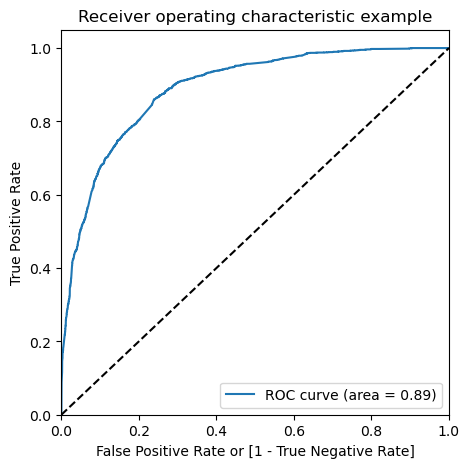

In [3404]:
draw_roc( y_train_pred_final['Converted'], y_train_pred_final['Converted_Prob'])

In [3405]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final['Converted_Prob'].map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Converted_Prob,LeadID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.075203,3009,0,1,0,0,0,0,0,0,0,0,0
1,0,0.293824,1012,0,1,1,1,0,0,0,0,0,0,0
2,0,0.637679,9226,1,1,1,1,1,1,1,1,0,0,0
3,1,0.682892,4750,1,1,1,1,1,1,1,1,0,0,0
4,1,0.920032,7987,1,1,1,1,1,1,1,1,1,1,1


In [3406]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final['Converted'], y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.385136  1.000000  0.000000
0.1   0.1  0.604157  0.985282  0.365429
0.2   0.2  0.762085  0.917416  0.664789
0.3   0.3  0.789482  0.875715  0.735467
0.4   0.4  0.809794  0.765740  0.837388
0.5   0.5  0.814202  0.697056  0.887580
0.6   0.6  0.807747  0.636141  0.915237
0.7   0.7  0.780822  0.517171  0.945967
0.8   0.8  0.760038  0.428046  0.967990
0.9   0.9  0.712171  0.274325  0.986428


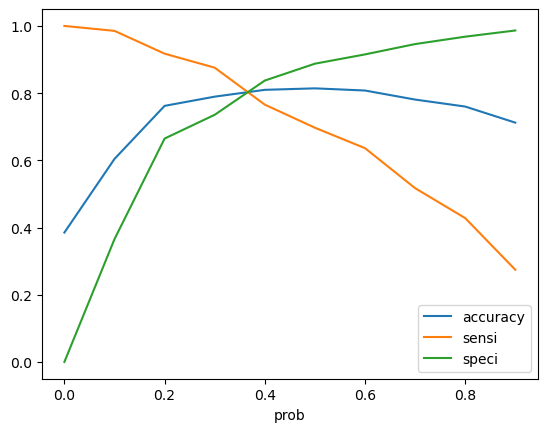

In [3407]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

From the curve above, 0.36 is the optimum point to take it as a cutoff probability.

In [3408]:
# Creating new column 'final_predicted' with 1 if Converted_Prob > 0.36 else 0
y_train_pred_final['final_predicted'] = y_train_pred_final['Converted_Prob'].map( lambda x: 1 if x > 0.36 else 0)
y_train_pred_final.head()

,Converted,Converted_Prob,LeadID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.075203,3009,0,1,0,0,0,0,0,0,0,0,0,0
1,0,0.293824,1012,0,1,1,1,0,0,0,0,0,0,0,0
2,0,0.637679,9226,1,1,1,1,1,1,1,1,0,0,0,1
3,1,0.682892,4750,1,1,1,1,1,1,1,1,0,0,0,1
4,1,0.920032,7987,1,1,1,1,1,1,1,1,1,1,1,1


In [3409]:
# Let's check the overall accuracy again
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.80286569044245

In [3410]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[3160,  745],
       [ 507, 1939]], dtype=int64)

In [3411]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [3412]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.7927228127555193

In [3413]:
# Let us calculate specificity
TN / float(TN+FP)

0.8092189500640204

In [3414]:
# Calculate false postive rate
print(FP/ float(TN+FP))

0.19078104993597952


In [3415]:
# Positive predictive value 
print (TP / float(TP+FP))

0.7224292101341282


In [3416]:
# Negative predictive value
print (TN / float(TN+ FN))

0.8617398418325607


Train set Summary
- Accuracy - 80%
- Sensitivity - 79%
- Specificity - 81%
- False Positive Rate - 19%
- Positive Predictive Value - 72%
- Negative Predictive Value - 86%

### 11. Making Predictions on the Test Set

In [3417]:
# Applying the scaling on test dataset
num_cols = ['TotalVisits','Total Time Spent on Website','Page Views Per Visit']
df_test[num_cols] = scaler.transform(df_test[num_cols])

In [3418]:
df_test.describe()

,Lead Number,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media and Others,Lead Source_Welingak Website,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
count,2723.000000,2723.000000,2723.000000,2723.000000,2723.000000,2723.000000,2723.000000,2723.000000,2723.000000,2723.000000,2723.000000,2723.000000,2723.000000,2723.000000,2723.000000,2723.00000,2723.000000,2723.000000,2723.000000,2723.000000,2723.000000,2723.0,2723.000000,2723.0,2723.000000,2723.000000,2723.000000,2723.000000,2723.0,2723.000000,2723.000000,2723.000000,2723.0,2723.0,2723.000000,2723.000000,2723.000000,2723.000000,2723.000000,2723.000000,2723.000000,2723.000000,2723.000000,2723.000000,2723.000000,2723.000000,2723.000000,2723.000000,2723.000000,2723.000000,2723.000000,2723.000000,2723.000000,2723.000000,2723.000000,2723.000000,2723.000000,2723.000000,2723.0,2723.000000,2723.0,2723.0,2723.000000,2723.000000,2723.000000,2723.000000,2723.0,2723.000000,2723.000000,2723.000000,2723.0
mean,616881.307749,0.078957,0.363202,0.195459,0.215404,0.257209,0.325009,0.543885,0.053250,0.002203,0.002203,0.307014,0.208961,0.127066,0.042233,0.01469,0.002203,0.010283,0.052883,0.033786,0.032317,0.0,0.388542,0.0,0.015057,0.002938,0.111274,0.070143,0.0,0.278369,0.007345,0.007345,0.0,0.0,0.052516,0.005876,0.012853,0.108704,0.016159,0.012119,0.087404,0.038928,0.018729,0.089240,0.022035,0.055454,0.008814,0.006243,0.005876,0.039295,0.023136,0.000734,0.001836,0.023871,0.598604,0.071612,0.005141,0.020566,0.0,0.324275,0.0,0.0,0.000734,0.361366,0.022769,0.036357,0.0,0.220345,0.002203,0.006243,0.0
std,23626.550030,0.269721,0.481011,0.192964,0.245176,0.219506,0.468464,0.498162,0.224573,0.046898,0.046898,0.461340,0.406641,0.333108,0.201157,0.12033,0.046898,0.100900,0.223841,0.180712,0.176874,0.0,0.487508,0.

In [3419]:
# Dividing into X and Y sets for the model building
y_test = df_test.pop('Converted')
X_test = df_test

In [3420]:
# Adding constant test dataset
X_test = X_test[X_train_new.columns]
X_test_new = sm.add_constant(X_test)

In [3421]:
# Making prdictions
y_test_pred = res.predict(X_test_new)

In [3422]:
y_test_pred[:10]

3271    0.047038
1490    0.972330
7936    0.039876
4216    0.841982
3830    0.047695
1800    0.638789
6507    0.358037
4821    0.339573
4223    0.942336
4714    0.334919
dtype: float64

In [3423]:
# Creating dataframe of probabilities
y_test_pred_final = pd.DataFrame({'Converted':y_test.values, 'Converted_Prob':y_test_pred})
y_test_pred_final['LeadID'] = y_test.index
y_test_pred_final.head()

,Converted,Converted_Prob,LeadID
3271,0,0.047038,3271
1490,1,0.972330,1490
7936,0,0.039876,7936
4216,1,0.841982,4216
3830,0,0.047695,3830


In [3424]:
# Creating new column 'predicted' with 1 if Converted_Prob > 0.36 else 0
y_test_pred_final['final_predicted'] = y_test_pred_final['Converted_Prob'].map(lambda x: 1 if x > 0.36 else 0)

# Let's see the head
y_test_pred_final.head()

,Converted,Converted_Prob,LeadID,final_predicted
3271,0,0.047038,3271,0
1490,1,0.972330,1490,1
7936,0,0.039876,7936,0
4216,1,0.841982,4216,1
3830,0,0.047695,3830,0


In [3425]:
# Let's check the overall accuracy again
metrics.accuracy_score(y_test_pred_final.Converted, y_test_pred_final.final_predicted)

0.8060962174072714

In [3426]:
confusion_test = metrics.confusion_matrix(y_test_pred_final.Converted, y_test_pred_final.final_predicted)
confusion_test

array([[1421,  313],
       [ 215,  774]], dtype=int64)

In [3427]:
TP = confusion_test[1,1] # true positive 
TN = confusion_test[0,0] # true negatives
FP = confusion_test[0,1] # false positives
FN = confusion_test[1,0] # false negatives

In [3428]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.782608695652174

In [3429]:
# Let us calculate specificity
TN / float(TN+FP)

0.8194925028835064

In [3430]:
# Calculate false postive rate
print(FP/ float(TN+FP))

0.18050749711649366


In [3431]:
# Positive predictive value 
print (TP / float(TP+FP))

0.7120515179392825


In [3432]:
# Negative predictive value
print (TN / float(TN+ FN))

0.8685819070904646


Test Set Summary
- Accuracy - 81%
- Sensitivity - 78%
- Specificity - 82%
- False Positive Rate - 18%
- Positive Predictive Value - 71%
- Negative Predictive Value - 87%

### 12. Precision-Recall View

In [3433]:
# Confusion Matrix
confusion = metrics.confusion_matrix(y_train_pred_final['Converted'], y_train_pred_final['Predicted'])
confusion

array([[3466,  439],
       [ 741, 1705]], dtype=int64)

#### Precision

In [3434]:
confusion[1,1]/(confusion[0,1]+confusion[1,1])

0.7952425373134329

#### Recall

In [3435]:
confusion[1,1]/(confusion[1,0]+confusion[1,1])

0.697056418642682

#### Precision and recall tradeoff

In [3436]:
y_train_pred_final[['Converted','Predicted']]

,Converted,Predicted
0,0,0
1,0,0
2,0,1
3,1,1
4,1,1
...,...,...
6346,0,0
6347,1,1
6348,0,1
6349,0,0


In [3437]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_Prob)

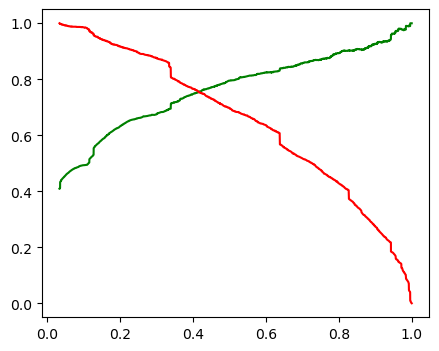

In [3438]:
# Plotting precision-recall and checking for precision-recall tradeoff
plt.figure(figsize=[5,4])
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

0.42 is the tradeoff between precision and recall.

In [3439]:
# Creating new column 'final_predicted_2' with 1 if Converted_Prob > 0.42 else 0
y_train_pred_final['final_predicted_2'] = y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.42 else 0)
y_train_pred_final.head()

,Converted,Converted_Prob,LeadID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted,final_predicted_2
0,0,0.075203,3009,0,1,0,0,0,0,0,0,0,0,0,0,0
1,0,0.293824,1012,0,1,1,1,0,0,0,0,0,0,0,0,0
2,0,0.637679,9226,1,1,1,1,1,1,1,1,0,0,0,1,1
3,1,0.682892,4750,1,1,1,1,1,1,1,1,0,0,0,1,1
4,1,0.920032,7987,1,1,1,1,1,1,1,1,1,1,1,1,1


In [3440]:
# Let's check the accuracy now
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted_2)

0.8112108329396945

In [3441]:
# Let's create the confusion matrix once again
confusion3 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted_2)
confusion3

array([[3313,  592],
       [ 607, 1839]], dtype=int64)

In [3442]:
# Let's evaluate the other metrics as well
TP = confusion3[1,1] # true positive 
TN = confusion3[0,0] # true negatives
FP = confusion3[0,1] # false positives
FN = confusion3[1,0] # false negatives

In [3443]:
# Calculate Precision
TP/(TP+FP)

0.7564788153023447

In [3444]:
# Calculate Recall
TP/(TP+FN)

0.7518397383483238

Train Set Summary
- Accuracy - 81%
- Precision - 76%
- Recall - 75%

#### Making Predictions on Test Set

In [3445]:
# Let's check y_test_pred_final again
y_test_pred_final

,Converted,Converted_Prob,LeadID,final_predicted
3271,0,0.047038,3271,0
1490,1,0.972330,1490,1
7936,0,0.039876,7936,0
4216,1,0.841982,4216,1
3830,0,0.047695,3830,0
...,...,...,...,...
850,0,0.051249,850,0
2879,0,0.102811,2879,0
6501,1,0.884503,6501,1
7155,0,0.094156,7155,0


In [3446]:
# Creating new column 'final_predicted_2' with 1 if Converted_Prob > 0.42 else 0
y_test_pred_final['final_predicted_2'] = y_test_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.42 else 0)
y_test_pred_final.head()

,Converted,Converted_Prob,LeadID,final_predicted,final_predicted_2
3271,0,0.047038,3271,0,0
1490,1,0.972330,1490,1,1
7936,0,0.039876,7936,0,0
4216,1,0.841982,4216,1,1
3830,0,0.047695,3830,0,0


In [3447]:
# Let's check the overall accuracy
metrics.accuracy_score(y_test_pred_final['Converted'], y_test_pred_final.final_predicted_2)

0.8178479618068307

In [3448]:
confusion_test2 = metrics.confusion_matrix(y_test_pred_final['Converted'], y_test_pred_final.final_predicted_2)
confusion_test2

array([[1486,  248],
       [ 248,  741]], dtype=int64)

In [3449]:
TP = confusion_test2[1,1] # true positive 
TN = confusion_test2[0,0] # true negatives
FP = confusion_test2[0,1] # false positives
FN = confusion_test2[1,0] # false negatives

In [3450]:
# Calculate Precision
TP/(TP+FP)

0.7492416582406471

In [3451]:
# Calculate Recall
TP/(TP+FN)

0.7492416582406471

Test Set Summary
- Accuracy - 82%
- Precision - 75%
- Recall - 75%

### 13. Conclusion

While we have checked both Sensitivity-Specificity as well as Precision-Recall metrices, we have considered the optimal cut off based on Sensitivity-Specificity for calculating the final prediction.

In [3452]:
# Concating train and test set
train_df = y_train_pred_final[['LeadID','Converted_Prob','final_predicted']]
test_df = y_test_pred_final[['LeadID','Converted_Prob','final_predicted']]
final_prob = pd.concat([train_df, test_df])

In [3453]:
# Merging leads and final_prob
leads['Index'] = leads.index
leads = pd.merge(left = final_prob, right = leads, left_on='LeadID', right_on='Index').drop(['Index','LeadID'], axis =1)
leads.head()

,Converted_Prob,final_predicted,Lead Number,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,A free copy of Mastering The Interview,Last Notable Activity
0,0.075203,0,630949,Landing Page Submission,Direct Traffic,0,0,2.0,397,2.0,Email Opened,Finance Management,Not Provided,1,Email Opened
1,0.293824,0,649355,Landing Page Submission,Direct Traffic,1,0,2.0,190,2.0,Email Bounced,Not Provided,Working Professional,0,Email Bounced
2,0.637679,1,579735,API,Olark Chat,0,0,0.0,0,0.0,SMS Sent,Not Provided,Unemployed,0,Modified
3,0.682892,1,614238,Landing Page Submission,Direct Traffic,0,1,2.0,1380,2.0,SMS Sent,Marketing Management,Not Provided,0,SMS Sent
4,0.920032,1,588625,Landing Page Submission,Direct Traffic,0,1,5.0,1584,2.5,SMS Sent,Finance Management,Unemployed,0,Modified


In [3454]:
# Arranging columns for better view
fst_col = leads.pop('Lead Number')
sec_col = leads.pop('Converted')
leads = pd.concat([fst_col, sec_col, leads], axis =1)

In [3455]:
# Inserting new column lead score
leads.insert(3, column='Lead Score', value = round(leads['Converted_Prob']*100))
leads.head()

,Lead Number,Converted,Converted_Prob,Lead Score,final_predicted,Lead Origin,Lead Source,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,A free copy of Mastering The Interview,Last Notable Activity
0,630949,0,0.075203,8.0,0,Landing Page Submission,Direct Traffic,0,2.0,397,2.0,Email Opened,Finance Management,Not Provided,1,Email Opened
1,649355,0,0.293824,29.0,0,Landing Page Submission,Direct Traffic,1,2.0,190,2.0,Email Bounced,Not Provided,Working Professional,0,Email Bounced
2,579735,0,0.637679,64.0,1,API,Olark Chat,0,0.0,0,0.0,SMS Sent,Not Provided,Unemployed,0,Modified
3,614238,1,0.682892,68.0,1,Landing Page Submission,Direct Traffic,0,2.0,1380,2.0,SMS Sent,Marketing Management,Not Provided,0,SMS Sent
4,588625,1,0.920032,92.0,1,Landing Page Submission,Direct Traffic,0,5.0,1584,2.5,SMS Sent,Finance Management,Unemployed,0,Modified


In [3456]:
# Identifying the hot leads having lead score of above 70.
hot_leads = leads[leads['Lead Score']>70]
hot_leads.head()

,Lead Number,Converted,Converted_Prob,Lead Score,final_predicted,Lead Origin,Lead Source,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,A free copy of Mastering The Interview,Last Notable Activity
4,588625,1,0.920032,92.0,1,Landing Page Submission,Direct Traffic,0,5.0,1584,2.5,SMS Sent,Finance Management,Unemployed,0,Modified
5,646388,1,0.767575,77.0,1,Landing Page Submission,Google,0,4.0,984,2.0,SMS Sent,Finance Management,Unemployed,0,SMS Sent
7,612248,1,0.910014,91.0,1,API,Google,0,7.0,1522,7.0,SMS Sent,Travel and Tourism,Unemployed,0,SMS Sent
8,591797,1,0.883985,88.0,1,Landing Page Submission,Direct Traffic,0,5.0,1978,5.0,Email Opened,Media and Advertising,Unemployed,1,Email Opened
9,646673,0,0.905664,91.0,1,Landing Page Submission,Direct Traffic,0,2.0,1497,2.0,SMS Sent,Finance Management,Unemployed,1,Modified


In [3457]:
hot_leads.shape

(2046, 16)

Number of hot leads = 2046

### Recommendations:

- People spending more time on the website have a good chance of buying the course.
- Demand for management courses is more than for other courses. 
- Leads from Working professionals have a good chance of converting.
- When a lead origin is Lead Add Form and the last activity is Had a phone conversation mostly tends to be converted.

Top 3 variables contributing most in lead conversion are:
- Total Time Spent on Website
- Lead Origin_Lead Add Form
- What is your current occupation_Working Professional

X Education should closely monitor if a lead is coming from the below sources because they have a good conversion rate or they contribute most to lead conversion:
- Welingak_website
- Olark Chat
- Referral
- Google

